In [10]:
from PIL import Image
from pathlib import Path
from skimage import measure
import numpy as np
import re
import ntpath
import random
from copy import deepcopy

In [11]:
#a class with image and its area (minus black background)
class im:
    def __init__(self,img,area,obj, total_area):
        self.img= img
        self.area = area
        self.obj =  obj
        self.total_area = total_area #0, total area of that object (the sum of individual obj area)

In [12]:
#create blank image for collage
DLinputsz = (1024,1024) #dimension of collage
imgblank= Image.new(mode="RGB",size=DLinputsz)

#create random generator
random.seed()
#random.randint(0, 1024)

In [13]:
#Need: 1.a variable that determines how much overlapping is allowed
#2.a variable that determines how much background space

#80% of the image will be filled
background_ratio = 0.8
collage_area = DLinputsz[0]* DLinputsz[1] * background_ratio #this is a float
filled_area = 0 #initialize area already filled to 0

#maximum overlapping between annotations, TODO
max_overlapping_area= 50

print(1024*1024)
#num_class = 12 #there are 12 classes
#class_area = collage_area /num_class #float: the area each class should occupy
#class_threshold = 20; # you can exceed class area by 20


1048576


In [14]:
#read crops from folder
folder_dir = 'imcrop'
pathes = Path(folder_dir).glob('*.png')

folder_mask_dir = 'mskcrop'
mask_pathes = Path(folder_mask_dir).glob('*.png')


In [15]:
#create a list of im class to store: (image array, area, classid, objid)
im_list=list()
obj_num = 0 #number of objects in the class

for path in pathes:
    obj_num = obj_num + 1 #increment number of objects
    image = Image.open(path)
    objid= re.findall("obj(\d+).png", ntpath.basename(path))

    image_arr = np.array(image) #change image into a numpy array?
    area = np.sum(image_arr>0) #get the area of image minus black background\

    im_list.append(im(image,area,objid, 0)) #add to the list of im classes


#the maximum area each object type could occupy
max_obj_area = collage_area / obj_num




In [16]:
#create a list of masks
mask_list = list()
for path in mask_pathes:
    image = Image.open(path)
    objid= re.findall("obj(\d+).png", ntpath.basename(path))
    image_arr = np.array(image)
    mask_list.append(im(image,0,objid, 0)) #don't need area


In [17]:
#add collage to image, need to track filled_area
#need to track each class' area (need to loop through entire list, find same class ID and update total_area)

#Question: change the x,y coord of image to the center? (so that it could cut off the edge) ??

while(filled_area <= collage_area):
    #loop through im_list
    #TODO: check overlapping (need to keep track of which pixels are set)
    for im,mask in zip(im_list,mask_list):
        #if total_area hasn't exceeded designated area for each class
        while(im.total_area <= max_obj_area):
            xycoord = (random.randint(0, DLinputsz[0]), random.randint(0, DLinputsz[1])) #create tuple of x,y coordinates to place on collage
            imgblank.paste(im.img, xycoord, mask=Image.fromarray((np.array(mask.img).astype('bool')*255)).convert('L')) #paste im onto imgblank, xy coord is the upper left corner of im

            #----update areas here----

            #TODO: exclude area that is out of bounds
            #which row and colum to delete

            max_x = (DLinputsz[0] - xycoord[0])
            max_y= DLinputsz[1] - xycoord[1]

            #find max row and column of arr_copy
            copy_img = deepcopy(im.img)
            arr_copy = np.array(copy_img)
            num_rows = arr_copy.shape[1]
            num_cols = arr_copy.shape[0]


            #NOTE: i am not sure if this works, i am making pixels that are out of bounds zero
            #then cropped_area is the sum of pixels in arr_copy that is greater than zero

            if(max_x <  num_cols): #check if part of the img is out of bounds
                for i in range (max_x,num_cols-1): #clear columns (x)
                    arr_copy[i] = 0

            if(max_y <  num_rows):
                for i in range (max_y,num_rows-1): #clear rows (y)
                    arr_copy[:i] = 0

            cropped_area = np.sum(arr_copy>0)



            #update filled_area and image total area
            filled_area = filled_area + cropped_area

            #TODO: if there is more than one object in a class, need to loop through all the objects in that class
            #and update the total_area
            im.total_area = im.total_area + cropped_area  #used to be img.area


#display collage
imgblank.show()


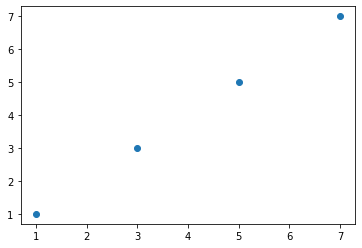

In [18]:
from matplotlib import pyplot as plt
plt.scatter([1,3,5,7],[1,3,5,7])

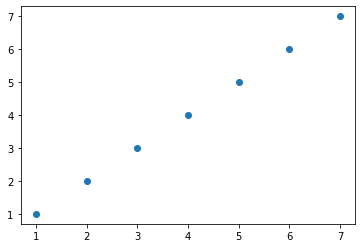

In [20]:
plt.scatter([1,2,3,4,5,6,7],[1,2,3,4,5,6,7])